<a href="https://colab.research.google.com/github/inuneko89/DADS_6003/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [428]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2024-02-17 14:41:14--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-17 14:41:14--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-17 14:41:14--  http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newco

In [429]:
pip install scikit-learn

In [746]:
import yfinance as yf

In [747]:
tesla = yf.Ticker('AAPL')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = tesla.history(interval=interval,start=start,end=end)
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,129.770004,130.899994,125.230003,125.459999
2023-01-03 10:30:00-05:00,125.459999,125.870003,124.730003,125.345001
2023-01-03 11:30:00-05:00,125.350197,125.370003,124.349098,124.660004
2023-01-03 12:30:00-05:00,124.660004,124.940002,124.190002,124.649902
2023-01-03 13:30:00-05:00,124.669899,125.000000,124.190002,124.570000
...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995


In [748]:
import numpy as np
import pandas as pd

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score,train_test_split

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


In [749]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)

X = df.iloc[:,:9]

In [750]:
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-03 09:30:00-05:00,129.770004,130.899994,125.230003,125.459999,NaN,NaN,NaN,NaN,NaN
2023-01-03 10:30:00-05:00,125.459999,125.870003,124.730003,125.345001,NaN,NaN,NaN,0.000000,-4.310005
2023-01-03 11:30:00-05:00,125.350197,125.370003,124.349098,124.660004,NaN,NaN,NaN,0.005196,-0.109802
2023-01-03 12:30:00-05:00,124.660004,124.940002,124.190002,124.649902,NaN,NaN,NaN,0.000000,-0.690193
2023-01-03 13:30:00-05:00,124.669899,125.000000,124.190002,124.570000,NaN,NaN,NaN,0.019997,0.009895
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994,193.479910,-0.520149,31.683003,0.004990,-1.544998
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994,193.245000,-0.264303,31.683003,0.005005,-0.059998
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995,193.051999,0.092220,35.924842,0.005005,0.000000


In [751]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [752]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [753]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ตรวจสอบและลบข้อมูลที่ไม่เหมาะสม
valid_indices = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)

X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [754]:
probability = model.predict_proba(X_test)
probability

array([[0.45139228, 0.54860772],
       [0.436451  , 0.563549  ],
       [0.42429008, 0.57570992],
       [0.47962237, 0.52037763],
       [0.44678318, 0.55321682],
       [0.4808979 , 0.5191021 ],
       [0.41915347, 0.58084653],
       [0.50050436, 0.49949564],
       [0.45633219, 0.54366781],
       [0.54101285, 0.45898715],
       [0.48937345, 0.51062655],
       [0.43974827, 0.56025173],
       [0.53414021, 0.46585979],
       [0.4671606 , 0.5328394 ],
       [0.56120193, 0.43879807],
       [0.42317884, 0.57682116],
       [0.45572272, 0.54427728],
       [0.48469373, 0.51530627],
       [0.4785399 , 0.5214601 ],
       [0.50906305, 0.49093695],
       [0.46358398, 0.53641602],
       [0.50213277, 0.49786723],
       [0.46462523, 0.53537477],
       [0.45045093, 0.54954907],
       [0.51769364, 0.48230636],
       [0.50158223, 0.49841777],
       [0.4643838 , 0.5356162 ],
       [0.4822253 , 0.5177747 ],
       [0.42153563, 0.57846437],
       [0.44012525, 0.55987475],
       [0.

In [755]:
probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

[[0.45139228 0.54860772]
 [0.436451   0.563549  ]
 [0.42429008 0.57570992]
 [0.47962237 0.52037763]
 [0.44678318 0.55321682]
 [0.4808979  0.5191021 ]
 [0.41915347 0.58084653]
 [0.50050436 0.49949564]
 [0.45633219 0.54366781]
 [0.54101285 0.45898715]
 [0.48937345 0.51062655]
 [0.43974827 0.56025173]
 [0.53414021 0.46585979]
 [0.4671606  0.5328394 ]
 [0.56120193 0.43879807]
 [0.42317884 0.57682116]
 [0.45572272 0.54427728]
 [0.48469373 0.51530627]
 [0.4785399  0.5214601 ]
 [0.50906305 0.49093695]
 [0.46358398 0.53641602]
 [0.50213277 0.49786723]
 [0.46462523 0.53537477]
 [0.45045093 0.54954907]
 [0.51769364 0.48230636]
 [0.50158223 0.49841777]
 [0.4643838  0.5356162 ]
 [0.4822253  0.5177747 ]
 [0.42153563 0.57846437]
 [0.44012525 0.55987475]
 [0.45062966 0.54937034]
 [0.45784415 0.54215585]
 [0.48144976 0.51855024]
 [0.44270978 0.55729022]
 [0.44928133 0.55071867]
 [0.48574684 0.51425316]
 [0.52480119 0.47519881]
 [0.44537728 0.55462272]
 [0.39804761 0.60195239]
 [0.44353349 0.55646651]


In [756]:
predicted

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1

In [757]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 44 124]
 [ 55 138]]


In [758]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.44      0.26      0.33       168
           1       0.53      0.72      0.61       193

    accuracy                           0.50       361
   macro avg       0.49      0.49      0.47       361
weighted avg       0.49      0.50      0.48       361



In [759]:
print(model.score(X_test,y_test))
0.528


0.5041551246537396


0.528

In [760]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# สร้าง SimpleImputer
imputer = SimpleImputer(strategy='mean')

# แทนที่ค่าที่หายไปใน X ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X_imputed = imputer.fit_transform(X)

# ใช้ cross-validation เพื่อประเมินโมเดล
cross_val = cross_val_score(LogisticRegression(), X_imputed, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.51428571 0.53142857 0.53448276 0.51149425 0.54022989 0.51149425
 0.51724138 0.55172414 0.57471264 0.56321839]
0.5350311986863712


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


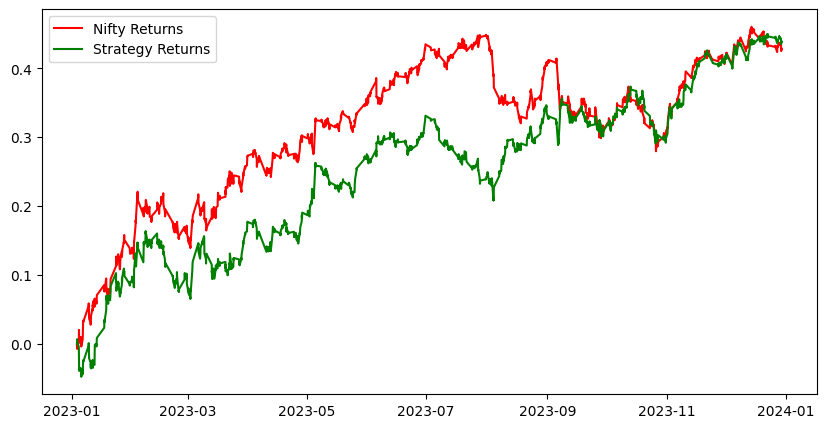

In [761]:
from sklearn.impute import SimpleImputer

predicted_signal = model.predict(X_imputed)

# เพิ่มคอลัมน์ Predicted_Signal ใน DataFrame
df['Predicted_Signal'] = predicted_signal

# คำนวณผลตอบแทนของ Nifty
df['Nifty_returns'] = np.log(df['Close'] / df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df['Nifty_returns'])  # ต้องกำหนด split ตามที่เหมาะสม

# คำนวณผลตอบแทนของกลยุทธ์
df['Strategy_returns'] = df['Nifty_returns'] * df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df['Strategy_returns'])  # ต้องกำหนด split ตามที่เหมาะสม

# พล็อตกราฟ
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')  # ปรับชื่อรายการให้เป็น 'Nifty Returns'
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')  # ปรับชื่อรายการให้เป็น 'Strategy Returns'
plt.legend()
plt.show()


In [762]:
X1 = X
X1

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-03 09:30:00-05:00,129.770004,130.899994,125.230003,125.459999,NaN,NaN,NaN,NaN,NaN
2023-01-03 10:30:00-05:00,125.459999,125.870003,124.730003,125.345001,NaN,NaN,NaN,0.000000,-4.310005
2023-01-03 11:30:00-05:00,125.350197,125.370003,124.349098,124.660004,NaN,NaN,NaN,0.005196,-0.109802
2023-01-03 12:30:00-05:00,124.660004,124.940002,124.190002,124.649902,NaN,NaN,NaN,0.000000,-0.690193
2023-01-03 13:30:00-05:00,124.669899,125.000000,124.190002,124.570000,NaN,NaN,NaN,0.019997,0.009895
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994,193.479910,-0.520149,31.683003,0.004990,-1.544998
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994,193.245000,-0.264303,31.683003,0.005005,-0.059998
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995,193.051999,0.092220,35.924842,0.005005,0.000000


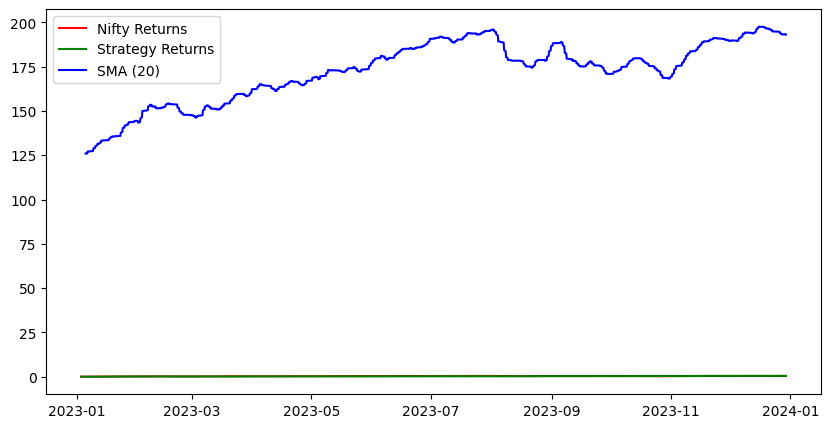